# ***-------RESTAURANT REVENUE PREDICTION------***

## **Objective**

The main objective of this project is to predict the revenue of a restaurant based on the given features.

## **Data Source**

Kaggle link : https://www.kaggle.com/datasets/anthonytherrien/restaurant-revenue-prediction-dataset

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

## **Import Data**

In [2]:
#Reading the data into the dataframe 'data'
data = pd.read_csv('restaurant_data.csv')


## **Describe Data**


In [3]:
data.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [5]:
data.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


## **Data Visualization**

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


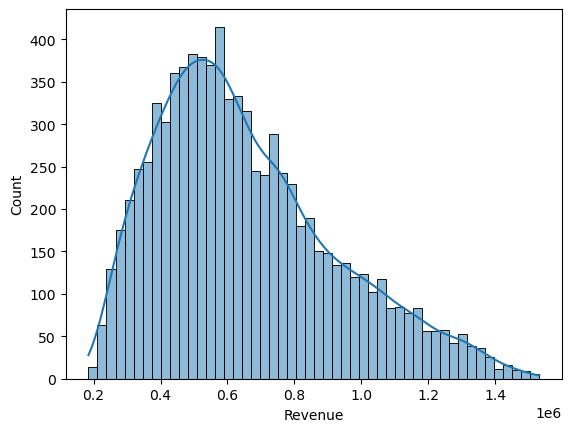

In [6]:
#plotting Revenue against count
sns.histplot(data=data,x='Revenue',kde=True,bins=50)
plt.show()

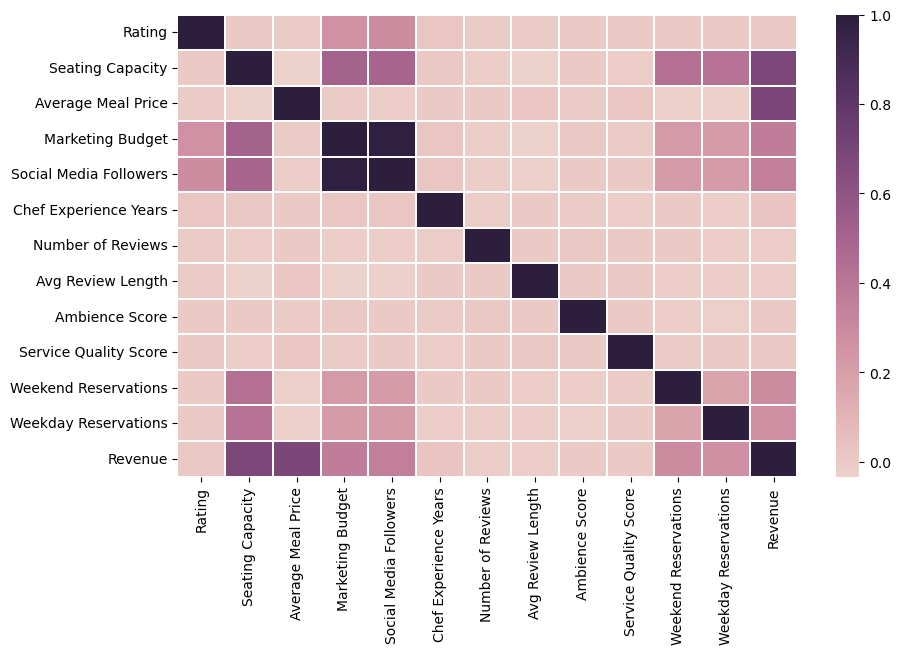

In [7]:
#analysing the correlation between different features using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(['Name','Cuisine','Parking Availability','Location'],axis=1).corr(),cmap=sns.cubehelix_palette(as_cmap=True),linewidths=0.01)
plt.show()

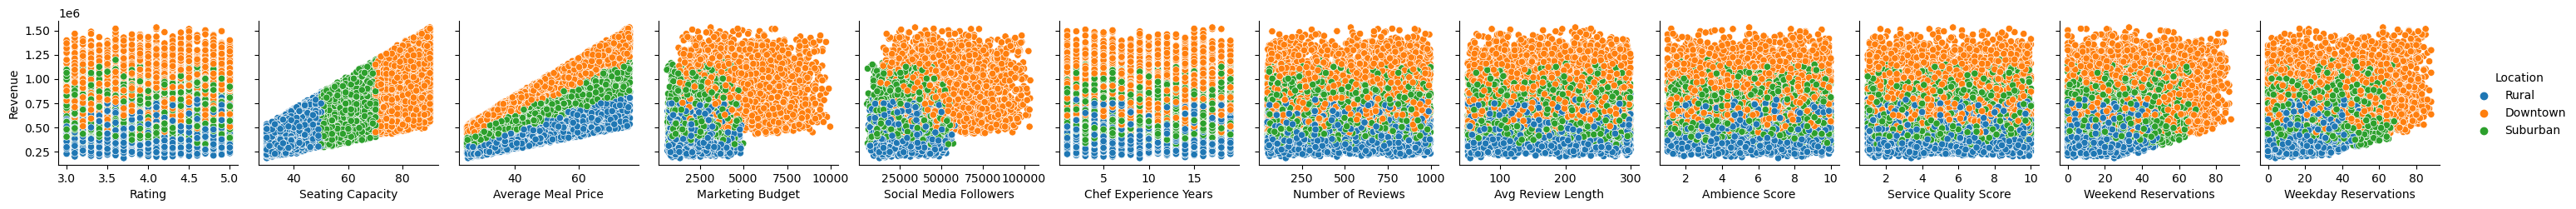

In [8]:
# analysing each feature with respect to Revenue
sns.pairplot(data = data, x_vars = [ 'Rating', 'Seating Capacity','Average Meal Price', 'Marketing Budget', 'Social Media Followers',
                                    'Chef Experience Years', 'Number of Reviews', 'Avg Review Length','Ambience Score', 'Service Quality Score',
                                    'Weekend Reservations', 'Weekday Reservations'],y_vars = ['Revenue'],hue = 'Location')
plt.show()

## **Data Preprocessing**

In [9]:
#dropping irrelevant features
data.drop(['Name'],axis=1,inplace=True)

In [10]:
#one-hot encoding for categorical features
data = pd.get_dummies(data)

In [11]:
#checking for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    8368 non-null   float64
 1   Seating Capacity          8368 non-null   int64  
 2   Average Meal Price        8368 non-null   float64
 3   Marketing Budget          8368 non-null   int64  
 4   Social Media Followers    8368 non-null   int64  
 5   Chef Experience Years     8368 non-null   int64  
 6   Number of Reviews         8368 non-null   int64  
 7   Avg Review Length         8368 non-null   float64
 8   Ambience Score            8368 non-null   float64
 9   Service Quality Score     8368 non-null   float64
 10  Weekend Reservations      8368 non-null   int64  
 11  Weekday Reservations      8368 non-null   int64  
 12  Revenue                   8368 non-null   float64
 13  Location_Downtown         8368 non-null   bool   
 14  Location

## **Define Target Variable (y) and Feature Variables (X)**

In [12]:
y =  data['Revenue']
X = data.drop(['Revenue'],axis=1)

## **Train Test Split**

In [13]:
X_train, y_train, X_test, y_test = train_test_split(X,y,random_state=42)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6276, 23), (2092, 23), (6276,), (2092,))

## **Modeling**

In [15]:
#Selecting the model 'RandomForestRegressor'
model = RandomForestRegressor()

In [16]:
#training the model
model.fit(X_train,X_test)

RandomForestRegressor()

## **Model Evaluation**

In [17]:
#evaluatimg the model
y_pred = model.predict(y_train)

In [18]:
mean_absolute_error(y_test,y_pred)

6005.9633440726675

In [19]:
mean_absolute_percentage_error(y_test,y_pred)

0.010299240371405801

In [20]:
#Printing the accuracy of the model
accuracy = r2_score(y_test,y_pred)
print('Accuracy of model : ',100*accuracy,'%')

Accuracy of model :  99.91705441927807 %


## **Prediction**

In [21]:
#Presenting the predicted Revenues alongside the original Revenues from test Dataset
result =list(zip(y_test,y_pred))
prediction = pd.DataFrame(result,columns=['Real_Values','Predicted_Values'])
prediction

,Real_Values,Predicted_Values
0,475928.60,481497.0968
1,300655.99,290806.5760
2,457425.31,457292.3935
3,943720.52,943508.1592
4,528782.15,541909.0757
...,...,...
2087,343620.18,339926.0701
2088,514513.25,517196.2793
2089,492150.92,488843.1329
2090,481013.94,489219.7616


## **Explanation**

    The raw restaurant dataset contains various features which may or may not affect the Revenue of the restaurant. This dataset is analyzed using built-in pandas functions and to identify the relationship between Revenue & other features and main features on which the Revenue is highly dependent on, various data visualizations are used namely, heatmap, pairplot, etc. Then data preprocessing is done to clean and transform the dataset into suitable form. Target variable and dependent variable are defined and train_test_split is done. Since Revenue is a continuous variable, different Regression models are chosen, trained and evaluated. The model with optimal predictions is identified and used for Predictions. In this case, it is RandomForestRegressor with an accuracy of 99.9%.